In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import tensorflow as ts
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,RNN,SimpleRNN


In [2]:
df = pd.read_csv('Clean_data.csv',index_col=0)
df.head()

,clean_text,Label
0,oily creamy expected ordered try highlight con...,0
1,palette decent price looking different shades ...,0
2,texture concealer pallet fantastic great cover...,0
3,really tell exactly thing powder kind oil ish ...,0
4,little smaller expected okay lasted long time ...,0


In [3]:
df['clean_text'] = df['clean_text'].apply(lambda x : str(x))

In [4]:
x = df['clean_text']
y = df['Label']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

# Tokenization

In [6]:
tok = Tokenizer(oov_token= '<unk>')

In [7]:
#We fit only on training data and transform on testing data

In [8]:
#fitting on training data
tok.fit_on_texts(x_train)

In [9]:
len(tok.word_index)

99369

In [10]:
train_sequences = tok.texts_to_sequences(x_train)
test_sequences = tok.texts_to_sequences(x_test)

In [11]:
with open('filename.pickle','wb')as handle:
    pickle.dump(tok,handle,protocol=pickle.HIGHEST_PROTOCOL)

## Padding

(array([77860., 78817., 41276., 23841., 14107.,  8816.,  5736.,  3758.,
         2619.,  1945.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

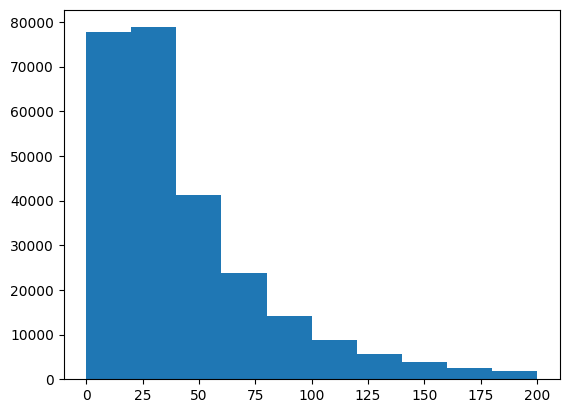

In [12]:
plt.hist(df['clean_text'].apply(lambda x : len(x.split())),range = (0,200))

In [13]:
x_train = pad_sequences(train_sequences,maxlen=100,padding='pre',truncating='pre')
x_test = pad_sequences(test_sequences,maxlen=100,padding='pre',truncating='pre')

# Model building

In [26]:
model = Sequential([
    Embedding(99370,300),
    SimpleRNN(128),
    Dense(100,activation='relu'),
    Dense(6,activation='softmax')    
])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 300)         29811000  
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 128)               54912     
                                                                 
 dense_6 (Dense)             (None, 100)               12900     
                                                                 
 dense_7 (Dense)             (None, 6)                 606       
                                                                 
Total params: 29,879,418
Trainable params: 29,879,418
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [29]:
history = model.fit(x_train,y_train,batch_size=500,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
424/424 [==============================] - 514s 1s/step - loss: 0.5744 - accuracy: 0.7788 - val_loss: 0.2377 - val_accuracy: 0.9287
Epoch 2/10
424/424 [==============================] - 528s 1s/step - loss: 0.2093 - accuracy: 0.9371 - val_loss: 0.2317 - val_accuracy: 0.9319
Epoch 3/10
424/424 [==============================] - 519s 1s/step - loss: 0.1549 - accuracy: 0.9542 - val_loss: 0.1938 - val_accuracy: 0.9417
Epoch 4/10
424/424 [==============================] - 518s 1s/step - loss: 0.1250 - accuracy: 0.9620 - val_loss: 0.2157 - val_accuracy: 0.9335
Epoch 5/10
424/424 [==============================] - 510s 1s/step - loss: 0.0885 - accuracy: 0.9736 - val_loss: 0.2179 - val_accuracy: 0.9369
Epoch 6/10
424/424 [==============================] - 500s 1s/step - loss: 0.0879 - accuracy: 0.9733 - val_loss: 0.2508 - val_accuracy: 0.9363
Epoch 7/10
424/424 [==============================] - 480s 1s/step - loss: 0.0665 - accuracy: 0.9801 - val_loss: 0.2387 - val_accuracy: 0.9384

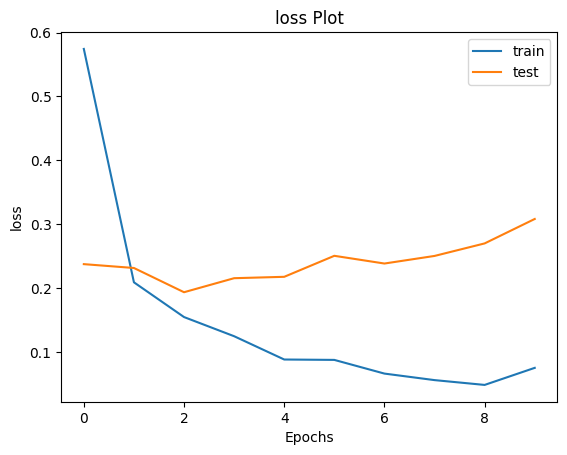

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('loss Plot')
plt.legend(['train','test'])

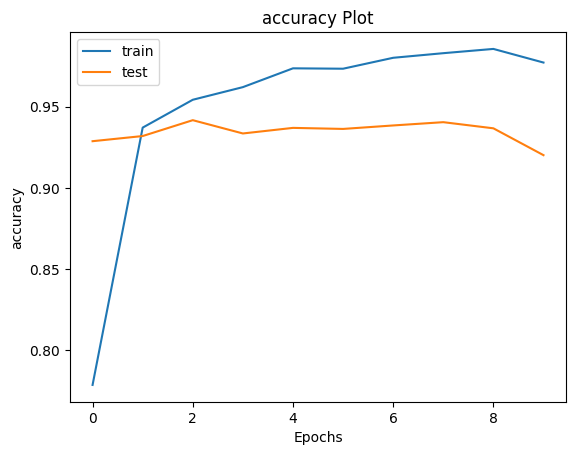

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('accuracy Plot')
plt.legend(['train','test'])